## GRIP - The Spark Foundation- Data Science & Business Analytics Internship

GRIPNOV2022



## By Purvaja Fursule

# Task 1


# To predict the score of a student who studies for 9.25 hrs/ day

## Importing libraries

PANDAS,NUMPY for data manuplation.

Matplotlib,seaborn module for Data Visualisation.

sklearn for modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')



## Importing dataset

In [3]:
df = pd.read_csv(r"C:\Users\utpal\OneDrive\Desktop\The-Sparks-Foundation-Internship-main\Task 1 - Supervised Machine Learning\student_scores - student_scores.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print("First 5 elements of the given dataset")
df.head()

First 5 elements of the given dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Exploratory Analysis of the DataSet

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following (i) Missing values (ii) Outliers

#### Summary Statistics


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Missing Values

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

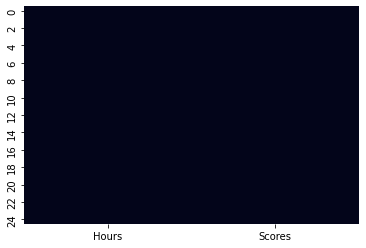

In [10]:
sns.heatmap(df.isnull(), cbar=False)

##### Observations:
    There are no missing values in this dataset.


##### Outliers

In [11]:
#percentile of each Predictors
df.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


<AxesSubplot:xlabel='Scores'>

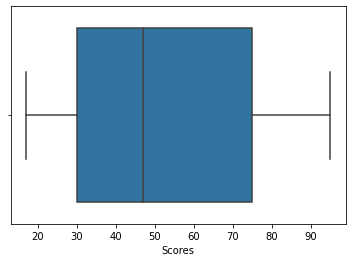

In [12]:
# to check the outliers in the data by plotting the boxplot
sns.boxplot(df.Scores)

<AxesSubplot:xlabel='Hours'>

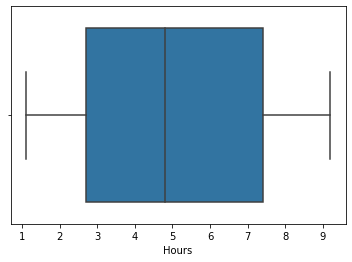

In [13]:
sns.boxplot(df.Hours)


##### Observation:
    There are no major outliers to be taken care of .

#### Visualizing Target variable Distribution


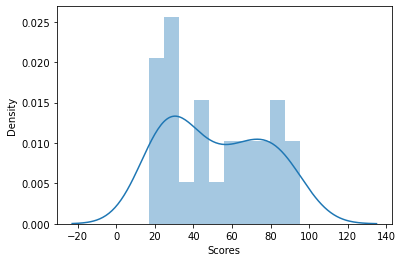

In [14]:
sns.distplot(df['Scores'], bins=10)
plt.show()

 In the above histogram, we can observe that Scores, there it is almost normally distributed with skew in the positive side
Hence, we can perform a LINEAR REGRESSION to predict the values



#### Correlation Matrix

<AxesSubplot:>

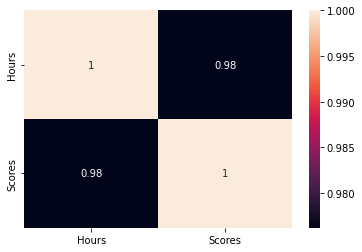

In [15]:

sns.heatmap(df.corr(),annot=True)


Hours and Scores are highly Positively correlated to each other


####  Visualizing Data with Scatter Plots


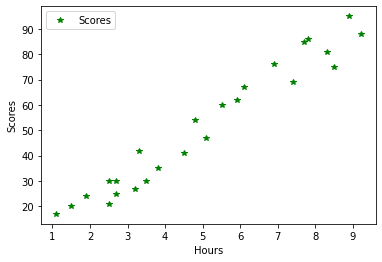

In [16]:
df.plot(x = 'Hours', y = 'Scores', style = '*',color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##### Observations
There is positive linear relationship between the number of hours studied and the scores obtained.

# Preparing the training data for Linear Regression



Independent variable = Number of hours studied

Dependent variable = Scores obtained

In [17]:
x=df.drop("Scores", axis=1)
y=df['Scores']

## Splitting the dataset for training and testing


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


## Training Linear Regression Model


In [20]:
scores_reg = LinearRegression()
scores_reg.fit(x_train, y_train)

LinearRegression()

## Predicting Scores


In [21]:
y_pred = scores_reg.predict(x_test)
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

## Evaluating Train and Test scores


In [22]:
print('Training Score : ', scores_reg.score(x_train, y_train))
print('Test Score : ', scores_reg.score(x_test, y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


## Comparing Actual Score and Predicted Score


In [23]:

output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
print(output.head())

    Actual Score  Predicted Score  Residual
14            17        11.029003  5.970997
0             21        25.628017 -4.628017
17            24        19.371297  4.628703
6             88        95.494730 -7.494730
23            76        71.510634  4.489366


## To visualize the differences between actual scores and predicted scores, a scatter plot is created


### (a) Training data Scores vs Predicted Scores

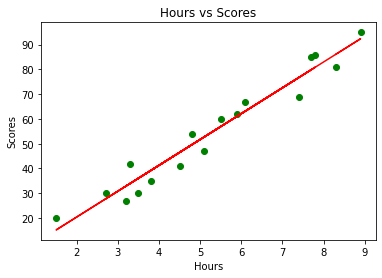

In [24]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, scores_reg.predict(x_train), color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### (b) Testing data Scores vs Predicted Scores


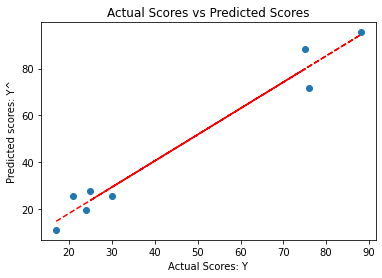

In [25]:
x=y_test
y=y_pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

## Model Evaluation (Actual Vs Predicted) on test sample


We will evaluate our model using error metrics like :
    
    mean_absolute_error,
    mean_squared_error,
    R2_score, T-test, F-Test

### Mean Absolute Error

In [26]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  5.936576124243742


### Root Mean Square Error

In [27]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root mean square error :  6.665333111498132


### Goodness of Fit- R2

In [28]:
metrics.r2_score(y_test,y_pred)

0.9420584734434517

#### Observations
That means that the model doing great linear model as less MAE and good R-Square value


### T-test

In [29]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> -0.06749127427810271
P-value --> 0.9471450243074203


95% of p-value suggest that the difference between mean of Actual and the Predicted values is close to zero



### F-Test

In [30]:
f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.004555072103682067
P-value --> 0.9471450243074162


F-statistic suggest that the variance of error is random and is in acceptable range with 95% confidance interval



## Summary

The output of linear regression at 95% confident level have 1 model variable.
    The model on train dataset have good R2 value suggest the goodness of fit.This is futher tested on the test sample.

In test sample R-square ,T-test, F-test were performed to measure the model performance in terms of goodness of fit & randomness of variance between actual and the predicted values.

In summary ,the model goodness of fit on train sample and performance of model on test sample  are in acceptable range.  The final model parameters are tabled below


## What will be predicted score if a student study for 9.25 hrs in a day?

In [31]:
study_hours = 9.25
score_pred = scores_reg.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632009


## Alternative way to calculate the score of the student


In [32]:
#Using the formula y = mx + c , where m = coeffiecient , c = intercept
y = scores_reg.coef_*9.25 + scores_reg.intercept_
y

array([96.016123])